In [34]:
import pandas as pd

table = pd.read_json("./data/results.json")

In [35]:
min_cost = table.groupby("instance")["cost"].min()
table = table.merge(right=min_cost, left_on="instance", right_index=True)
table.rename(columns={"cost_x": "cost", "cost_y": "min_cost"}, inplace=True)
table["relative_cost"] = table["cost"] / table["min_cost"]
table

,instance,turns,type,length,coverage,value,cost,turn_factor,area,min_cost,relative_cost
0,633783764,236.666647,hex,2457.202746,4435.715793,4435.715793,2693.869392,1,4495.166656,2558.904765,1.052743
1,633783764,276.460154,hex,2464.130949,4427.375841,4427.375841,2740.591102,1,4495.166656,2558.904765,1.071002
2,633783764,760.265422,square,2536.000000,4419.496220,4419.496220,3296.265422,1,4495.166656,2558.904765,1.288155
3,633783764,273.318561,square,2548.000000,4480.153689,4480.153689,2821.318561,1,4495.166656,2558.904765,1.102549
4,633783764,760.265422,square,2428.000000,4394.747237,4394.747237,3188.265422,1,4495.166656,2558.904765,1.245949
...,...,...,...,...,...,...,...,...,...,...,...
6679,14617614,367.566340,square,2840.000000,5310.986053,5310.985934,3207.566340,1,5357.240869,3207.566340,1.000000
6680,14617614,441.917367,hex,3006.840202,5293.485726,5293.485726,3448.757569,1,5357.240869,3207.566340,1.075194
6681,14617614,992.743279,square,3152.000000,5239.865653,5239.865653,4144.743279,1,5357.240869,3207.566340,1.292177
6682,14617614,444.011762,hex,2875.204341,5297.364258,5297.364258,3319.216102,1,5357.240869,3207.566340,1.034808


In [36]:
max_coverage = table.groupby("instance")["coverage"].max()
table = table.merge(right=max_coverage, left_on="instance", right_index=True)
table.rename(
    columns={"coverage_x": "coverage", "coverage_y": "best_coverage"}, inplace=True
)
table["relative_coverage"] = table["coverage"] / table["best_coverage"]
table

,instance,turns,type,length,coverage,value,cost,turn_factor,area,min_cost,relative_cost,best_coverage,relative_coverage
0,633783764,236.666647,hex,2457.202746,4435.715793,4435.715793,2693.869392,1,4495.166656,2558.904765,1.052743,4480.153689,0.990081
1,633783764,276.460154,hex,2464.130949,4427.375841,4427.375841,2740.591102,1,4495.166656,2558.904765,1.071002,4480.153689,0.988220
2,633783764,760.265422,square,2536.000000,4419.496220,4419.496220,3296.265422,1,4495.166656,2558.904765,1.288155,4480.153689,0.986461
3,633783764,273.318561,square,2548.000000,4480.153689,4480.153689,2821.318561,1,4495.166656,2558.904765,1.102549,4480.153689,1.000000
4,633783764,760.265422,square,2428.000000,4394.747237,4394.747237,3188.265422,1,4495.166656,2558.904765,1.245949,4480.153689,0.980937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,14617614,367.566340,square,2840.000000,5310.986053,5310.985934,3207.566340,1,5357.240869,3207.566340,1.000000,5356.313482,0.991538
6680,14617614,441.917367,hex,3006.840202,5293.485726,5293.485726,3448.757569,1,5357.240869,3207.566340,1.075194,5356.313482,0.988270
6681,14617614,992.743279,square,3152.000000,5239.865653,5239.865653,4144.743279,1,5357.240869,3207.566340,1.292177,5356.313482,0.978260
6682,14617614,444.011762,hex,2875.204341,5297.364258,5297.364258,3319.216102,1,5357.240869,3207.566340,1.034808,5356.313482,0.988994


In [37]:
data = (
    table.groupby(["instance", "type"])[
        "relative_cost", "area", "turn_factor", "relative_coverage"
    ]
    .mean()
    .reset_index()
)
data

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,instance,type,relative_cost,area,turn_factor,relative_coverage
0,7466260,hex,1.056057,7394.355717,5,0.995268
1,7466260,square,1.256213,7394.355717,5,0.994806
2,14617614,hex,1.047097,5357.240869,1,0.986532
3,14617614,square,1.166431,5357.240869,1,0.985143
4,22941329,hex,1.185214,692.845230,50,0.972822
...,...,...,...,...,...,...
253,967348823,square,1.186331,2114.528361,50,0.983233
254,977792482,hex,1.121648,896.574959,5,0.976099
255,977792482,square,1.205796,896.574959,5,0.980874
256,980192137,hex,1.087472,3782.228738,50,0.987456


<AxesSubplot:xlabel='area', ylabel='relative_cost'>

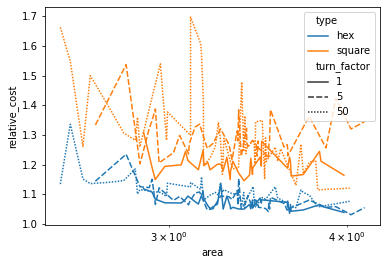

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
plt.gca().set_xscale("log")
sns.lineplot(
    ax=plt.gca(),
    data=data,
    x="area",
    y="relative_cost",
    hue="type",
    style="turn_factor",
)

<AxesSubplot:xlabel='area', ylabel='relative_coverage'>

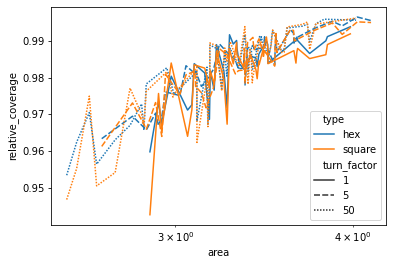

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
plt.gca().set_xscale("log")
sns.lineplot(
    ax=plt.gca(),
    data=data,
    x="area",
    y="relative_coverage",
    hue="type",
    style="turn_factor",
)

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='area', ylabel='relative_coverage'>

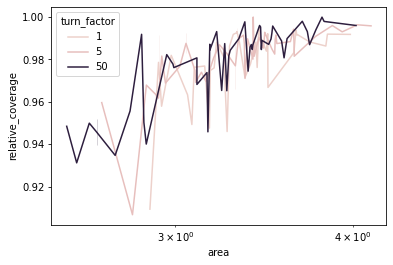

In [42]:
data = (
    table[table["relative_cost"] <= 1.01]
    .groupby(["instance", "type"])[
        "relative_cost", "area", "turn_factor", "relative_coverage"
    ]
    .mean()
    .reset_index()
)
fig = plt.figure()
plt.gca().set_xscale("log")
sns.lineplot(
    ax=plt.gca(), data=data, x="area", y="relative_coverage", hue="turn_factor"
)